## Data Visualizations ##

Dolci Sanders and Wayne Hong 

Follow us on github @dolcikey and @wooyounghong!

This notebook is the explaination of our data visualizations. 
We will be using the imported libraries Maplotlib, Seaborn, Pandas, Math, and Numpy. 
Our data frame, Movies_df comes from our webscraped data through Box Office Mojo. 
The csv file is available on our github. 



In [1]:
# plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# math and df manipulation libraries
import pandas as pd
import numpy as np
import math
import time
import re
import requests
import sys
import json
import ast

In [2]:
movie_df = pd.read_csv('final_movie.csv', index_col = 0)

In [3]:
movie_df.head()

,title,release_date,genres,mpaa,budget_cost,total_gross,runtime,release_month,release_year,world_gross,domestic_gross,month_year,genre_1
0,Finding Dory,"Jun 17, 2016","['Adventure', 'Animation', 'Comedy', 'Family']",PG,NaN,"{'domestic_gross': 486295561, 'worldwide_gross...",1 hr 37 min,Jun,2016,1028570889,486295561,Jun 2016,Adventure
1,Rogue One: A Star Wars Story,"Dec 16, 2016","['Action', 'Adventure', 'Sci-Fi']",PG-13,200000000.0,"{'domestic_gross': 532177324, 'worldwide_gross...",2 hr 13 min,Dec,2016,1056057273,532177324,Dec 2016,Action
2,Captain America: Civil War,"May 6, 2016","['Action', 'Adventure', 'Sci-Fi']",PG-13,250000000.0,"{'domestic_gross': 408084349, 'worldwide_gross...",2 hr 27 min,May,2016,1153296293,408084349,May 2016,Action
3,The Secret Life of Pets,"Jul 8, 2016","['Adventure', 'Animation', 'Comedy', 'Family']",PG,75000000.0,"{'domestic_gross': 368384330, 'worldwide_gross...",1 hr 27 min,Jul,2016,875457937,368384330,Jul 2016,Adventure
4,The Jungle Book,"Apr 15, 2016","['Adventure', 'Drama', 'Family', 'Fantasy']",PG,175000000.0,"{'domestic_gross': 364001123, 'worldwide_gross...",1 hr 46 min,Apr,2016,966550600,364001123,Apr 2016,Adventure


## Question 1: When should we release original content? ##

This question asks when is the Worldwide or Domestic Gross the highest, and for what month. 

### Analysis ###
As we see on the charts plotted below, both domestic and world wide gross seems to be showing the same distribution, world-wide, however, does show an increase in July where Domestic does not. 

As a streaming service, by this data, I would recommend setting the launch date for December or November, repectively. Additionally the range for both June and July do overlap with some of the range in December or November. 

The last of the 3 charts for question 1 shows the average worldwide gross per 100 million per month. 

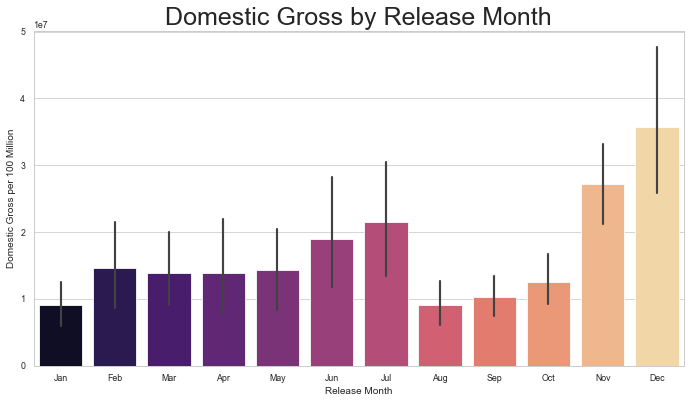

In [4]:
# We are primarily using seaborn for it's more modern approach to visuals. 
# Here the figure size is set to 10,6

Months =['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

#placed a white grid for more easily readable values formatting 
#formatting
plt.figure(figsize =(10,6)) 
sns.set_style("whitegrid")
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":25,"axes.labelsize":10})

#plot
months = sns.barplot( x = movie_df['release_month'], y = movie_df['domestic_gross'], 
                     data = movie_df, order=Months, palette = 'magma')

#labels
months = months.set_xticklabels(months.get_xticklabels(), rotation=0, horizontalalignment='center')

plt.title('Domestic Gross by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Domestic Gross per 100 Million')
plt.tight_layout()
plt.show()

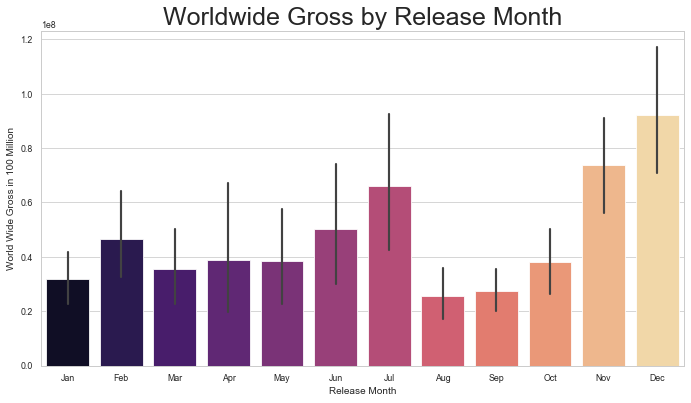

In [5]:
#formatting

plt.figure(figsize =(10,6)) 
sns.set_style("whitegrid")
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":25,"axes.labelsize":10})

#plot
months = sns.barplot( x = movie_df['release_month'], y = movie_df['world_gross'], data = movie_df, order=Months, palette = 'magma')

#labels
months = months.set_xticklabels(months.get_xticklabels(), rotation=0, horizontalalignment='center')
plt.title('Worldwide Gross by Release Month')
plt.xlabel('Release Month')
plt.ylabel('World Wide Gross in 100 Million')
plt.tight_layout()
plt.show()

In [146]:
#to plot the average world wide gross 
mean_world_gross = list(movie_df.groupby(movie_df.release_month)['world_gross'].mean())
mean_dom_gross =list(movie_df.groupby(movie_df.release_month)['domestic_gross'].mean())

In [7]:
#months corresponding
month = ['Apr', 'Aug', 'Dec', 'Feb', 'Jan','Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep']

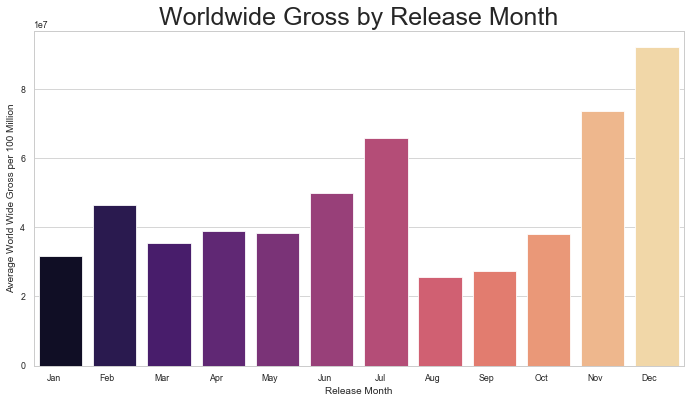

In [8]:
#formatting
plt.figure(figsize =(10,6)) 
sns.set_style("whitegrid")
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":25,"axes.labelsize":10})

#plot
months = sns.barplot( x = month, y = mean_world_gross, order=Months, palette = 'magma')

#labels
months = months.set_xticklabels(months.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.title('Worldwide Gross by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Average World Wide Gross per 100 Million')
plt.tight_layout()
plt.show()

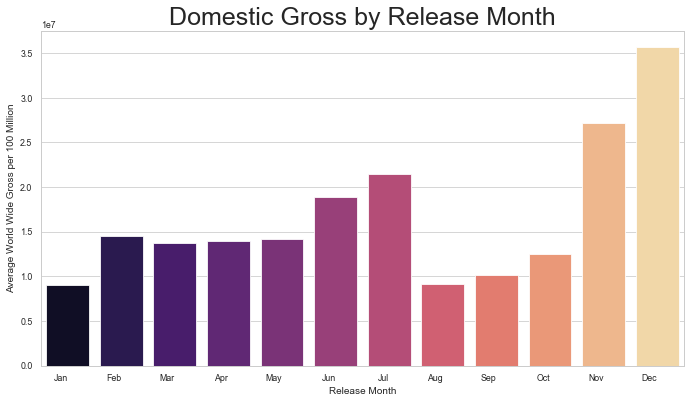

In [148]:
#formatting
plt.figure(figsize =(10,6)) 
sns.set_style("whitegrid")
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":25,"axes.labelsize":10})

#plot
months = sns.barplot( x = month, y = mean_dom_gross, order=Months, palette = 'magma')

#labels
months = months.set_xticklabels(months.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.title('Domestic Gross by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Average World Wide Gross per 100 Million')
plt.tight_layout()
plt.show()

## Question 2: What genre has the highest return? ##

This question depends on the Genre/Total Gross

### Analysis ###

The data indicates that Action and Adventure have the higher return. 
We have limited every movie to one genre, meaning that this graph is not entirely accurate. 
This is a complex subject because so many genres and mixes now exist. 

When looking at the data on multiple graphs, different conclusions can be drawn when not compared to each other.
The first graph is by average worldwide gross in a bar chart, the second one showing range in a bar chart, the count of movies in a bar plot, worldwide gross by genre scatter plot, and last average worldwide gross per genre in a scatter plot. 

These combined charts give us a better picture of the content. 
We know:
 1. top grossing are Action, Adventure, and Family
 2. Drama accounts for more of the count than any other 1 genre
 
Additionally, we have to note that becasue only 1 genre was taken from each movie, there are multiple ways to plot this, and multiple datasets that can be draw from this specifically.  
 

In [17]:
#using this version of the df, I can drop the [] genres to create this table
#we used only 1 genre, the first one listed to plot this chart 

genre_df = movie_df.copy()
genre_df['genre_1'].apply(lambda x: np.nan if (x) == '[]' else x)
num_rows = genre_df['genre_1'].apply(lambda x: np.nan if (x) == '[]' else x)
num_rows.isna().sum()
num_rows.dropna(inplace=True)
num_rows.isna().sum()
genre_df['genre'] = genre_df['genre_1']



In [18]:
genre_average = genre_df.groupby(genre_df.genre)['world_gross'].mean()
genre_index = genre_average.index

In [21]:
genre_df['genre_1'].unique()


array(['Adventure', 'Action', 'Animation', 'Biography', 'Comedy',
       'Horror', 'Drama', 'Crime', 'Documentary', 'Mystery', 'Musical',
       'Family', 'Fantasy', 'Film-Noir', 'Sci-Fi', 'Thriller', 'Sport',
       '[]', 'Romance', 'Music', 'Western', 'Reality-TV', 'News', 'War',
       'Adult', 'History', 'Short'], dtype=object)

In [26]:
input_out = list(genre_df[genre_df['genre_1'] == '[]'].index)





In [28]:
genre_df.drop(input_out, axis = 0, inplace = True)

In [29]:
genre_average = genre_df.groupby(genre_df.genre)['world_gross'].mean()
genre_index = genre_average.index

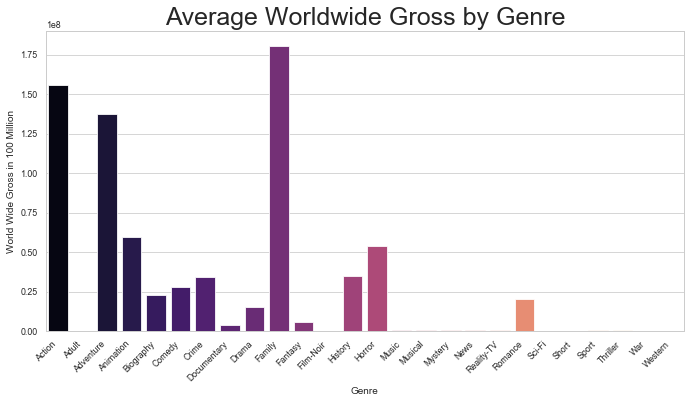

In [30]:
#formatting
plt.figure(figsize =(10,6)) 
sns.set_style("whitegrid")
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":25,"axes.labelsize":10})

#plot
genre_gross = sns.barplot( x = genre_index, y = genre_average, data = movie_df, palette = 'magma')
plt.ylim([0,190000000])

#labels, turned to the side so the fit and are legible 
genre = genre_gross.set_xticklabels(genre_gross.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Average Worldwide Gross by Genre')
plt.xlabel('Genre')
plt.ylabel('World Wide Gross in 100 Million')
plt.tight_layout()
plt.show()


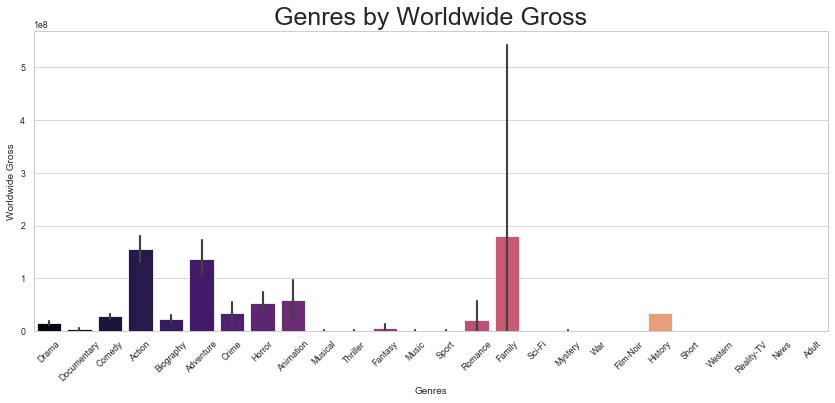

In [31]:


#format
plt.figure(figsize =(12,6)) 
sns.set_style("whitegrid")
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":25,"axes.labelsize":10})

#plot
bar_genre = sns.barplot(x = genre_df['genre_1'], y = genre_df['world_gross'], data = genre_df, palette = 'magma', order = genre_df['genre_1'].value_counts().index)
bar_genre.set_xticklabels(bar_genre.get_xticklabels(), rotation=45, horizontalalignment='center')

#labels
plt.title('Genres by Worldwide Gross')
plt.xlabel('Genres')
plt.ylabel('Worldwide Gross')
plt.tight_layout()
plt.show()

Text(80.95, 0.5, 'Count')

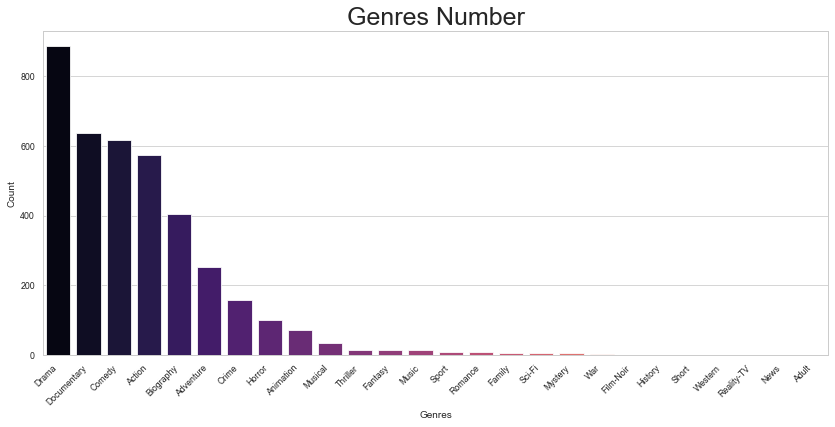

In [32]:
#ordered by value count 

plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":25,"axes.labelsize":10})
count_genres = sns.countplot(data= genre_df,
    x= genre_df['genre'],
    palette='magma',  order = genre_df['genre'].value_counts().index)
count_genres.set_xticklabels(count_genres.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.title('Genres Number')
plt.xlabel('Genres')
plt.ylabel('Count')

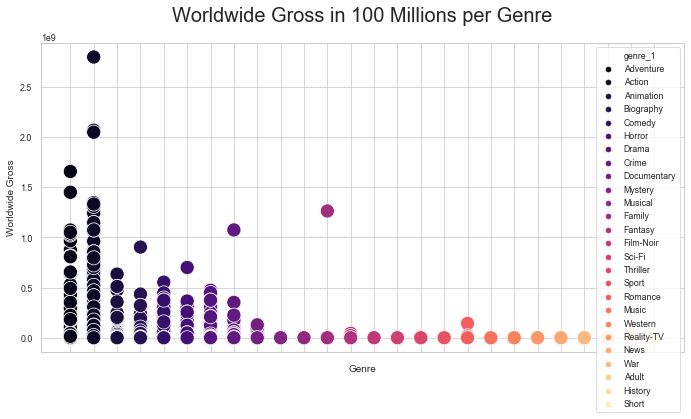

In [129]:
#format
plt.figure(figsize =(10,6)) 
sns.set_style("whitegrid")
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":25,"axes.labelsize":10})

#plot
genre_scatter = sns.scatterplot(x = genre_df['genre_1'], y = genre_df['world_gross'], data = genre_df, hue = 'genre_1', palette='magma', markers=['o'], s = 200)

#labels
genre_scatter.set_xticklabels(genre_scatter.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Worldwide Gross in 100 Millions per Genre',size=20, y=1.05)
plt.xlabel('Genre')
plt.ylabel('Worldwide Gross')
plt.tight_layout()


In [34]:
list(genre_index)

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Thriller',
 'War',
 'Western']

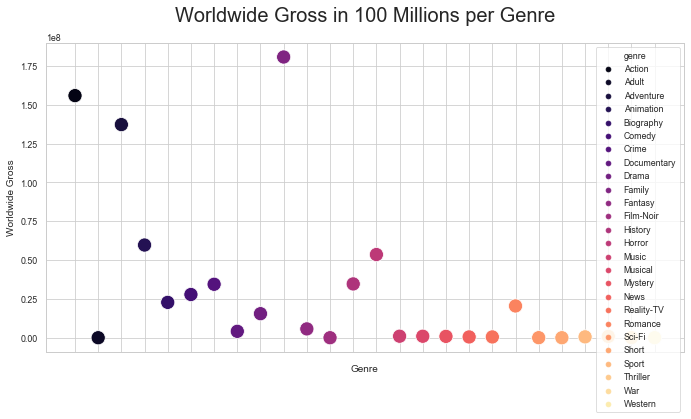

In [128]:
#format
plt.figure(figsize =(10,6)) 
sns.set_style("whitegrid")
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":25,"axes.labelsize":10})

#plot
genre_scattered = sns.scatterplot(x = genre_index, y = genre_average, 
                                data = movie_df, hue = genre_index, palette='magma', markers=['o'], s = 200)

#labels
genre_scattered.set_xticklabels(genre_scattered.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Worldwide Gross in 100 Millions per Genre',size=20, y=1.05)
plt.xlabel('Genre')
plt.ylabel('Worldwide Gross')
plt.tight_layout()

## Question 3: How much should we budget? ##

What budget produces the highest revenue?


### Analysis ### 


Most movies with a budget spend of 100-200 million return an estimated 500 million dollars.
This is very packed data which shows that with that 100-200 million you could return as much as 1 billion dollars. 





In [36]:
budget_df = movie_df.copy()

In [37]:
budget_df.dropna(inplace = True)

In [142]:
budget_df.describe()

,budget_cost,release_year,world_gross,domestic_gross,world_gross_10
count,6.010000e+02,601.000000,6.010000e+02,6.010000e+02,6.010000e+02
mean,6.009335e+07,2017.507488,2.172216e+08,8.604575e+07,2.172216e+07
std,5.994049e+07,1.314164,3.012342e+08,1.110329e+08,3.012342e+07
min,1.000000e+05,2015.000000,8.708000e+03,8.708000e+03,8.708000e+02
25%,1.800000e+07,2016.000000,4.304659e+07,2.401119e+07,4.304659e+06
50%,3.800000e+07,2018.000000,1.076046e+08,4.802309e+07,1.076046e+07
75%,9.000000e+07,2019.000000,2.554080e+08,1.028265e+08,2.554080e+07
max,3.560000e+08,2020.000000,2.797801e+09,9.366622e+08,2.797801e+08


In [39]:
budget_df['world_gross_10'] = (budget_df['world_gross']/10)

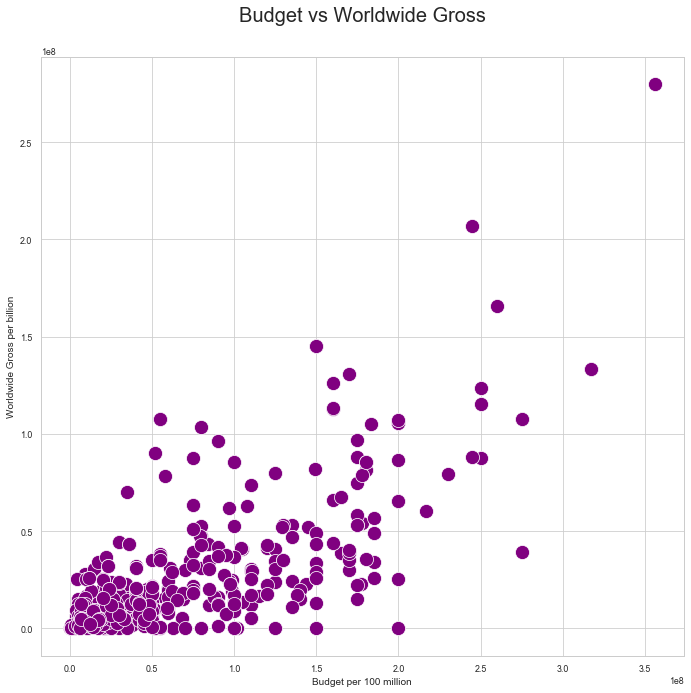

In [141]:
#format
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":25,"axes.labelsize":10})

#plot
budget_gross = sns.scatterplot(x = budget_df['budget_cost'], y = budget_df['world_gross_10'], data = budget_df, color = 'purple', markers=['o'], s = 200)

#labels
plt.title('Budget vs Worldwide Gross', size=20, y=1.05)
plt.xlabel('Budget per 100 million')
plt.ylabel('Worldwide Gross per billion')
plt.tight_layout()

## Question 4: What rating we target? ##

What MPAA has the most Worldwide Gross? 

### Analysis ###

While we can see that G likely has higher returns due to it being for everyone, this questions is ambiguous. 
However, it could be interpreted that most movies fall in to PG and PG-13 and are the safter bet for releasing content. 


In [41]:
movie_df.isna().sum()

title                0
release_date         0
genres               0
mpaa              2049
budget_cost       3220
total_gross          0
runtime             43
release_month        0
release_year         0
world_gross          0
domestic_gross       0
month_year           0
genre_1              0
dtype: int64

In [42]:
mpaa_df = movie_df.copy()
#mpaa_df.dropna(axis = 0, inplace = True)


In [87]:
gross_mpaa = movie_df.groupby(movie_df.mpaa)['world_gross'].mean()
mpaa_rating = gross_mpaa.index

In [59]:
mpaa_df.head()

,title,release_date,genres,mpaa,budget_cost,total_gross,runtime,release_month,release_year,world_gross,domestic_gross,month_year,genre_1
0,Finding Dory,"Jun 17, 2016","['Adventure', 'Animation', 'Comedy', 'Family']",PG,NaN,"{'domestic_gross': 486295561, 'worldwide_gross...",1 hr 37 min,Jun,2016,1028570889,486295561,Jun 2016,Adventure
1,Rogue One: A Star Wars Story,"Dec 16, 2016","['Action', 'Adventure', 'Sci-Fi']",PG-13,200000000.0,"{'domestic_gross': 532177324, 'worldwide_gross...",2 hr 13 min,Dec,2016,1056057273,532177324,Dec 2016,Action
2,Captain America: Civil War,"May 6, 2016","['Action', 'Adventure', 'Sci-Fi']",PG-13,250000000.0,"{'domestic_gross': 408084349, 'worldwide_gross...",2 hr 27 min,May,2016,1153296293,408084349,May 2016,Action
3,The Secret Life of Pets,"Jul 8, 2016","['Adventure', 'Animation', 'Comedy', 'Family']",PG,75000000.0,"{'domestic_gross': 368384330, 'worldwide_gross...",1 hr 27 min,Jul,2016,875457937,368384330,Jul 2016,Adventure
4,The Jungle Book,"Apr 15, 2016","['Adventure', 'Drama', 'Family', 'Fantasy']",PG,175000000.0,"{'domestic_gross': 364001123, 'worldwide_gross...",1 hr 46 min,Apr,2016,966550600,364001123,Apr 2016,Adventure


In [ ]:
#mpaa_rating_sort = mpaa_df['world_gross'].sort_values().index()
mpaa_rating_1 = ['PG-13', 'PG', 'G', 'R', 'Not Rated', 'MPG', 'NC-17']
#order= mpaa_df['world_gross'].value_counts().index


In [82]:
#print(mpaa_df['world_gross'].groupby('mpaa').sum())

Text(0, 0.5, 'Worldwide Gross')

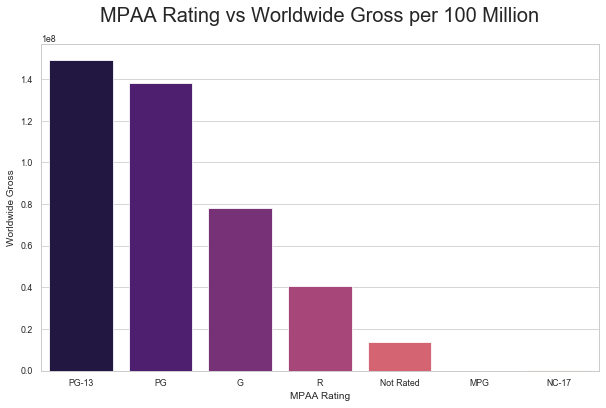

In [108]:
#format
plt.figure(figsize =(10,6)) 
sns.set_style("whitegrid")
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":25,"axes.labelsize":10})
plt.tight_layout()


#plot
sns.barplot(x= mpaa_rating, y = gross_mpaa, data = mpaa_df, palette= 'magma', 
            order= mpaa_rating_1)

#labels
plt.title('MPAA Rating vs Worldwide Gross per 100 Million', size=20, y=1.05)

plt.xlabel('MPAA Rating')
plt.ylabel('Worldwide Gross')



Text(65.45, 0.5, 'Worldwide_Gross Gross')

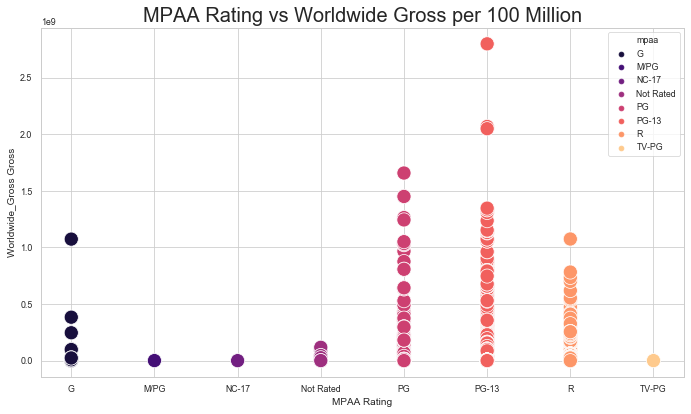

In [117]:
#format
plt.figure(figsize =(10,6)) 
sns.set_style("whitegrid")
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":25,"axes.labelsize":10})

#plot
mpaa =sns.scatterplot(x= mpaa_df['mpaa'], y = mpaa_df['world_gross'], data = mpaa_df, hue = 'mpaa', palette='magma', markers=['o'], s = 200)

#labels
plt.tight_layout()
plt.title('MPAA Rating vs Worldwide Gross per 100 Million', size=20, y=1.05)
plt.xlabel('MPAA Rating')
plt.ylabel('Worldwide_Gross Gross')



## Question 5: Does runtime affect total gross? ##

For this, we find the runtime in minutes plotted by total worldwide gross. 

### Analysis ###

There is some correlation between runtime and gross revenue, or simply that most movies tend to run between 61-63 minutes. It is possible that has more industry standard, but does show that longer movies do not guarantee additional revenue and may not be advised to spend additional money to make a longer film. 



In [46]:
# convert runtime to minutes
def convert_runtime(time):
    arr = str(time).split()
    if len(arr) == 4:
        hour = int(arr[0])
        minutes = int(arr[2])
        total = hour * 60 + minutes
        return total
convert_runtime('1 hr 37 min')
movie_df['runtime_min'] = movie_df['runtime'].apply(lambda x: convert_runtime(x))
# movie_df['runtime_min'].apply(lambda x: True if type(x) != float else False)
movie_df['runtime_min']


0        97.0
1       133.0
2       147.0
3        87.0
4       106.0
        ...  
3872    140.0
3873     98.0
3874    119.0
3875     91.0
3876     94.0
Name: runtime_min, Length: 3852, dtype: float64

In [47]:
#average

gross_runtime = movie_df.groupby(movie_df.runtime_min)['world_gross'].mean()
runtime_index = gross_runtime.index

Text(65.45, 0.5, 'Worldwide Gross')

<Figure size 720x432 with 0 Axes>

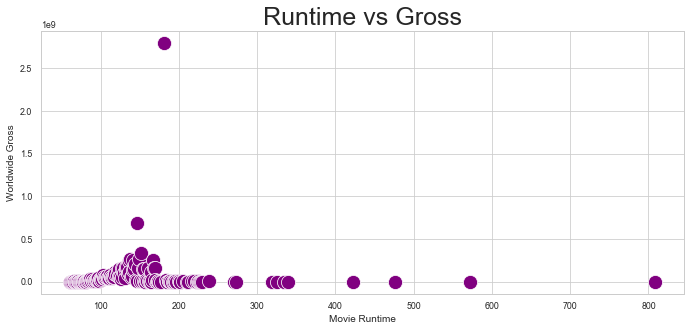

In [48]:
#format
plt.figure(figsize =(10,6)) 
sns.set_style("whitegrid")
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":25,"axes.labelsize":10})
plt.tight_layout()

# plot
plt.figure(figsize = (10,5))
bar_time = sns.scatterplot(x = runtime_index, y = gross_runtime, data = movie_df, color = 'purple', s = 200)


#titles
plt.title('Runtime vs Gross')
plt.tight_layout()
plt.xlabel('Movie Runtime')
plt.ylabel('Worldwide Gross')



Text(65.45, 0.5, 'Worldwide Gross')

<Figure size 720x432 with 0 Axes>

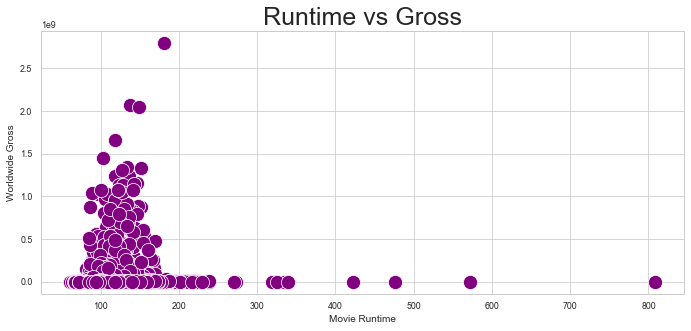

In [49]:
#format
plt.figure(figsize =(10,6)) 
sns.set_style("whitegrid")
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":25,"axes.labelsize":10})
plt.tight_layout()

# plot
plt.figure(figsize = (10,5))
bar_time = sns.scatterplot(x = 'runtime_min', y = 'world_gross', data = movie_df, color = 'purple', s = 200)


#titles
plt.title('Runtime vs Gross')
plt.tight_layout()
plt.xlabel('Movie Runtime')
plt.ylabel('Worldwide Gross')

